In [149]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
#import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

1. Загрузите датасет taxi.csv.

In [2]:
data = pd.read_csv('taxi.csv')
data.head(10)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.000,-1.000,Standard,business,1
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0
8,493006,5,20,6080,753429,55.818748,37.338240,55.835764,37.294710,6.222,15.433,Economy,private,0
9,953983,6,7,6080,533820,55.839155,37.251947,55.833198,37.312197,10.410,23.083,Economy,private,0


2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.

Проверим, нет ли в данных пропущенных значений.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


In [5]:
data.isna().sum()

offer_gk                  0
weekday_key               0
hour_key                  0
driver_gk                 0
order_gk                  0
driver_latitude           0
driver_longitude          0
origin_order_latitude     0
origin_order_longitude    0
distance_km               0
duration_min              0
offer_class_group         0
ride_type_desc            0
driver_response           0
dtype: int64

Пропущенных значений нет!

Проверим данные на аномалии и выбросы

In [6]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


Насколько я понял, данные почищены. Пропущенные значения возможно заменены на -1. Например, в колонках origin_order_latitude, origin_order_longitude, distance_km,duration_min.
Есть выбросы на очень большое расстояние и соответственно длительность поездки.

In [30]:
# Удаление дубликатов
data.drop_duplicates()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.000,-1.000,Standard,business,1
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0
8,493006,5,20,6080,753429,55.818748,37.338240,55.835764,37.294710,6.222,15.433,Economy,private,0
9,953983,6,7,6080,533820,55.839155,37.251947,55.833198,37.312197,10.410,23.083,Economy,private,0


Дубликатов не было.

In [7]:
feature_names = data.columns.tolist() 
for column in feature_names: 
    print(column)
    print(data[column].value_counts(dropna=False))

offer_gk
534523    1
513801    1
139921    1
539282    1
799379    1
         ..
927150    1
798127    1
578992    1
318897    1
393216    1
Name: offer_gk, Length: 100000, dtype: int64
weekday_key
5    19284
6    15466
0    14411
4    13290
1    13089
2    12859
3    11601
Name: weekday_key, dtype: int64
hour_key
23    8184
21    7398
22    6881
0     6646
20    6566
19    6369
18    5889
17    5028
16    4500
15    4249
14    3584
8     3550
1     3467
13    3355
9     3298
12    3169
11    2890
10    2840
7     2482
2     2275
4     2193
5     1809
3     1768
6     1610
Name: hour_key, dtype: int64
driver_gk
1421    3014
1060    2780
1126    2328
4490    1784
2442    1588
        ... 
2844      52
1978      52
689       52
854       51
3242      50
Name: driver_gk, Length: 439, dtype: int64
order_gk
853342    14
714527    13
761031    13
828548    12
180487    12
          ..
529767     1
361705     1
57063      1
782999     1
786432     1
Name: order_gk, Length: 81435, dtype: int64

Выяснил, что параметры дистанция и длительность поездки для 26207 значений = -1, и для 152 значений = 0. Это чуть боьше четверти всех данных.
Так же координаты широты и долготы для заказов origin_order_latitude, origin_order_longitude совпалают для многих тысяч значений. Скорее всего заказы поступают из одних и тех же домов.

Визуально сравним для примера взаимосвязь дистанции и длительности поездки, чтобы выявить возможные аномалии.

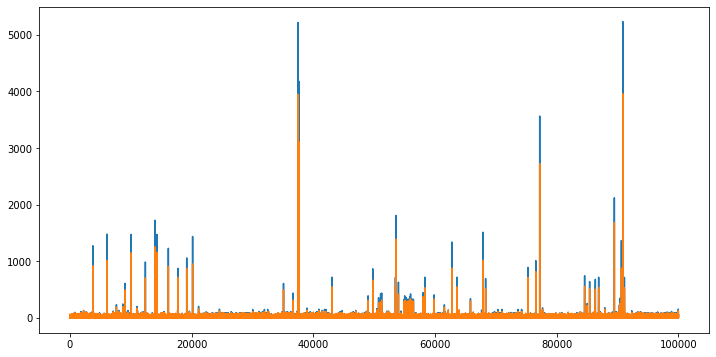

In [8]:
plt.figure(figsize=(12,6))
plt.plot(data.distance_km)
plt.plot(data.duration_min)

In [ ]:
Видно чёткую зависимость. Визуально аномалий не наблюдается.

<Figure size 720x1152 with 0 Axes>

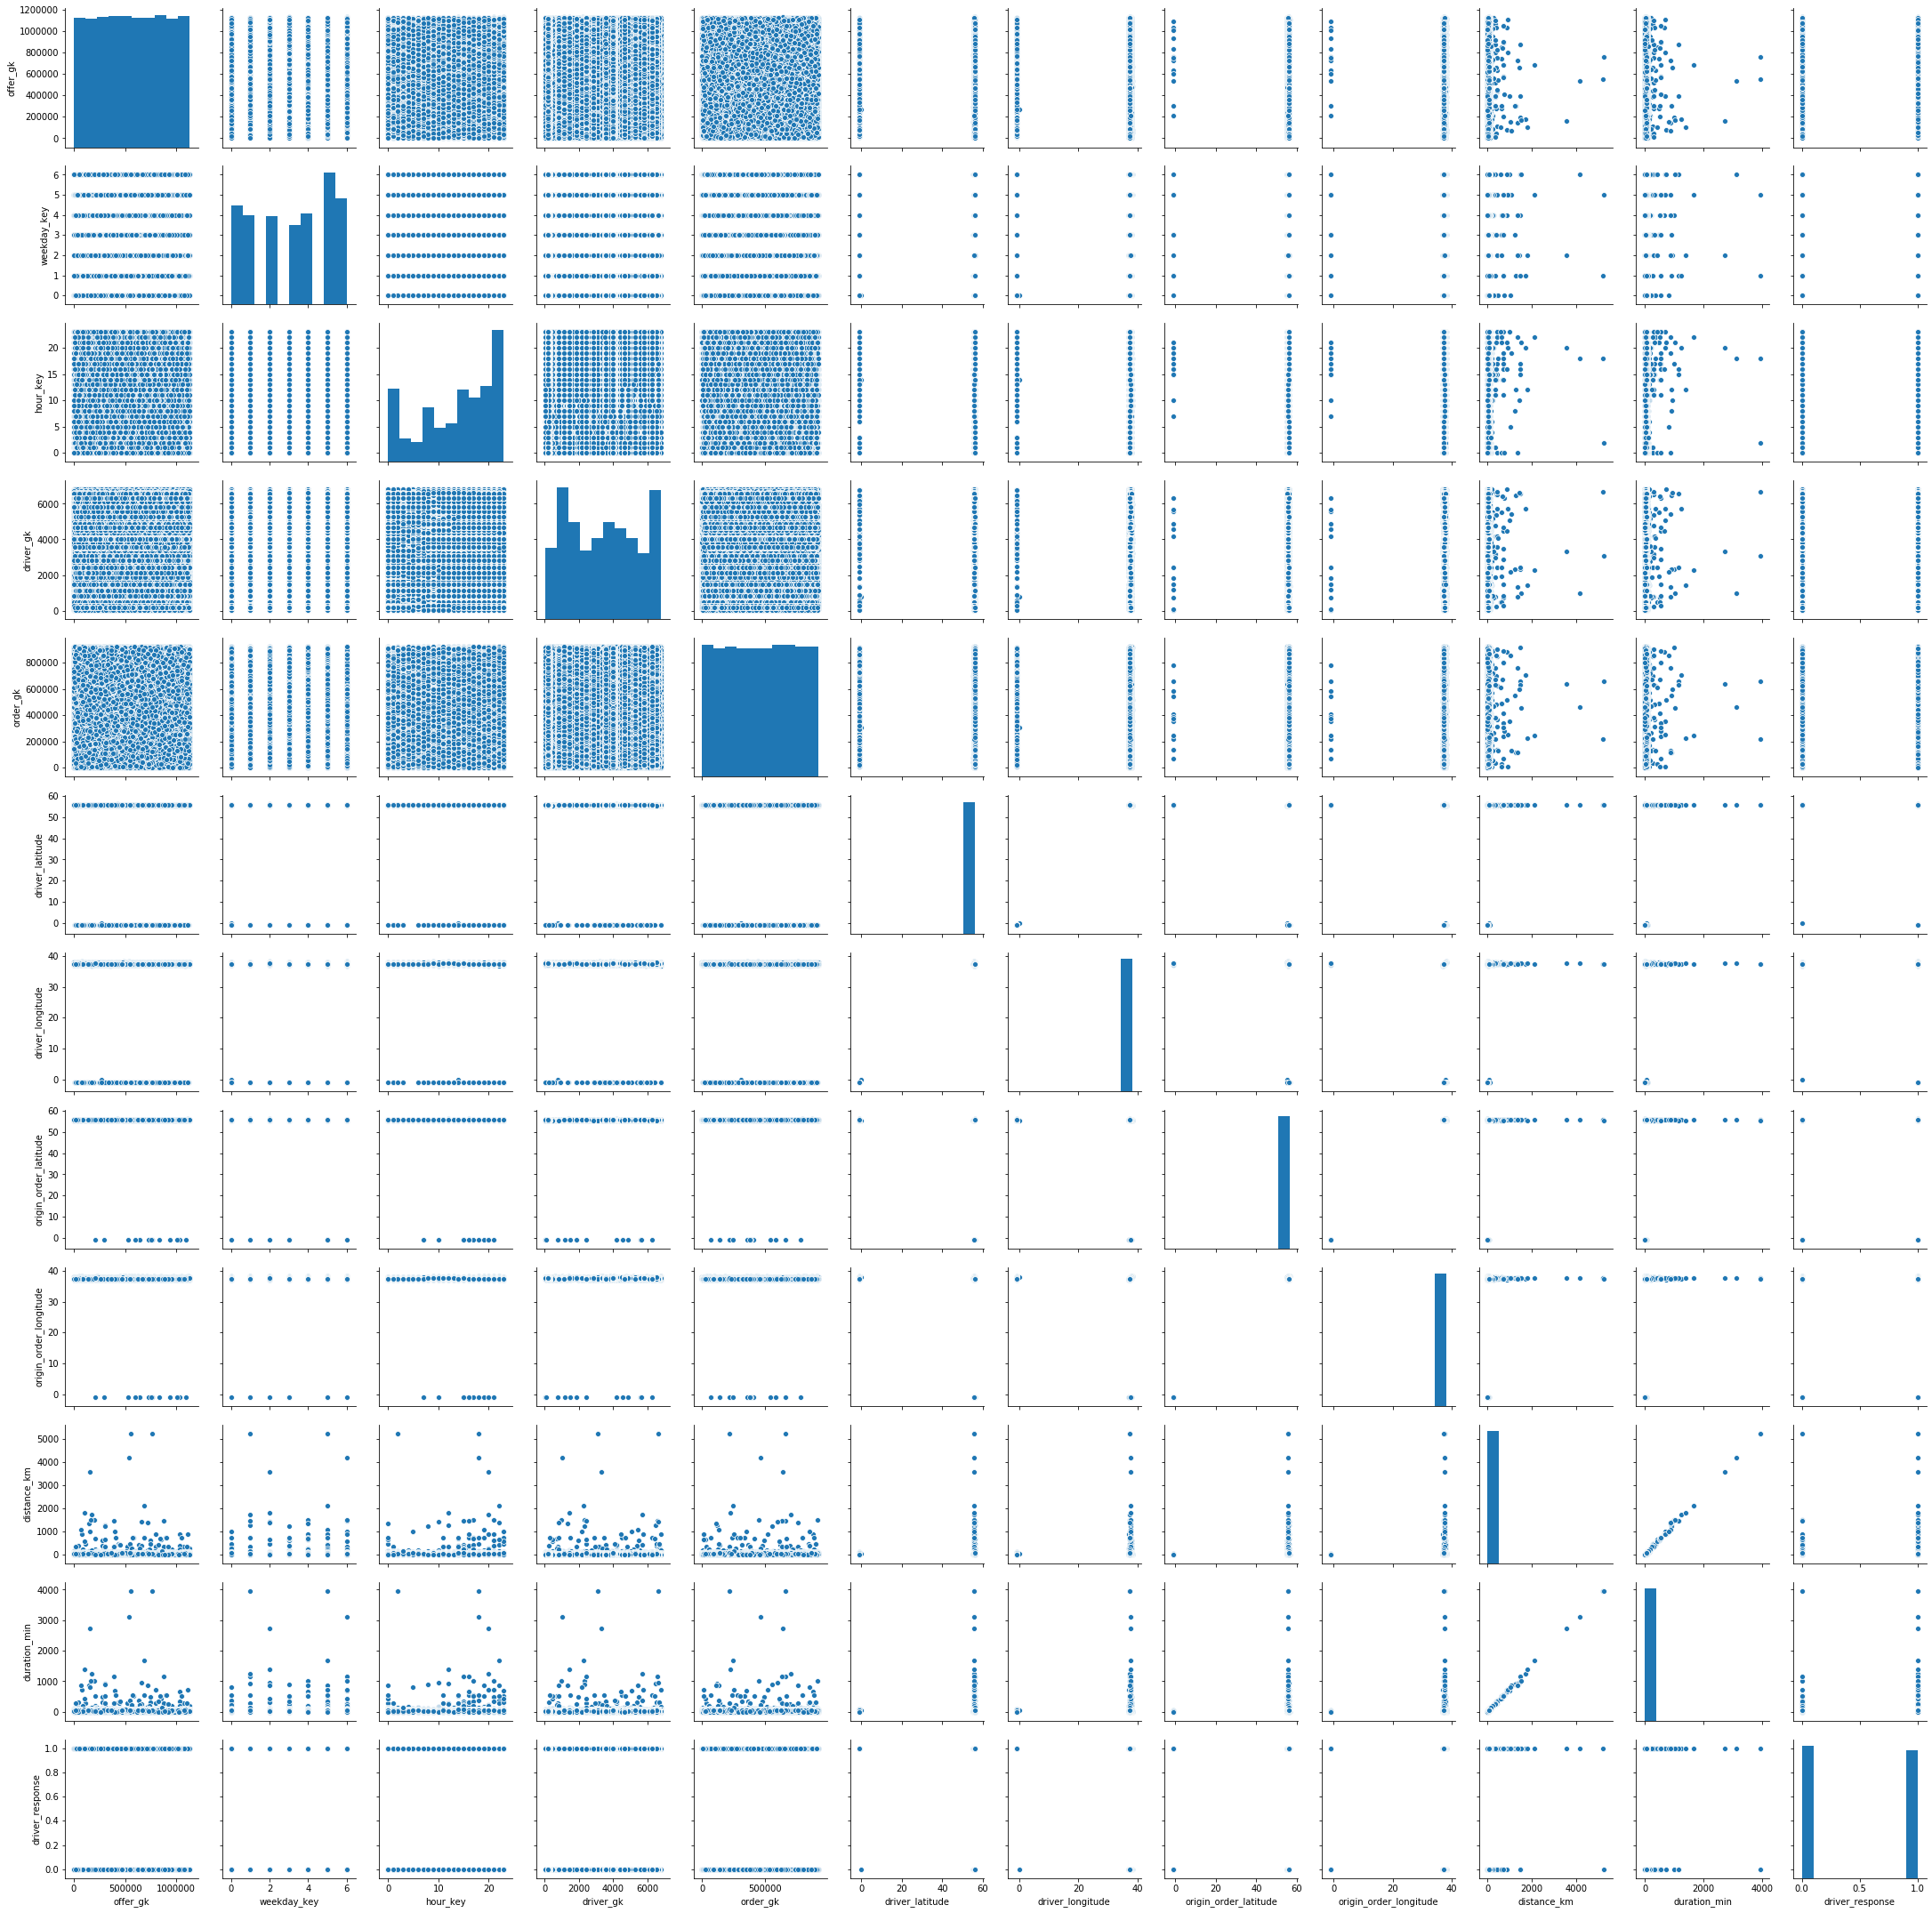

In [10]:
# Плотности распределения всех параметров исходного датасета data
plt.figure(figsize=(10, 16))
sns.pairplot(data)
plt.show()

In [3]:
# Создадим второй датасет отфильтрованный по дистанции поездки. Выкинем отрицательные, нулевые и очень большие значения.
data1 = data.query('distance_km > 0 and distance_km < 200')
data1.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,7.357000e+04,73570.000000,73570.000000,73570.000000,73570.000000,73570.000000,73570.000000,73570.000000,73570.000000,73570.000000,73570.000000,73570.000000
mean,5.657901e+05,3.149871,13.803099,3461.472965,461918.014109,55.766265,37.536403,55.771715,37.540288,24.484169,31.139495,0.471510
std,3.262853e+05,2.078289,7.315336,2039.405647,266110.843357,0.925000,0.638943,0.712343,0.498693,19.702527,17.716340,0.499191
min,4.000000e+00,0.000000,0.000000,14.000000,27.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.005000,0.017000,0.000000
25%,2.848680e+05,1.000000,8.000000,1421.000000,230542.500000,55.705809,37.413468,55.705604,37.407117,7.956000,16.600000,0.000000
50%,5.648435e+05,3.000000,16.000000,3507.000000,463095.000000,55.774850,37.528130,55.775044,37.527131,18.632000,28.200000,0.000000
75%,8.496198e+05,5.000000,20.000000,5246.000000,692512.000000,55.961102,37.625451,55.962322,37.625323,38.728000,44.333000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.000000,56.018542,38.232760,56.025061,38.204119,180.045000,157.100000,1.000000


In [4]:
# Делаем переиндексацию после удаления строк из исходного датафрейма
data1.reset_index(inplace=True)
data1.index.max()

73569

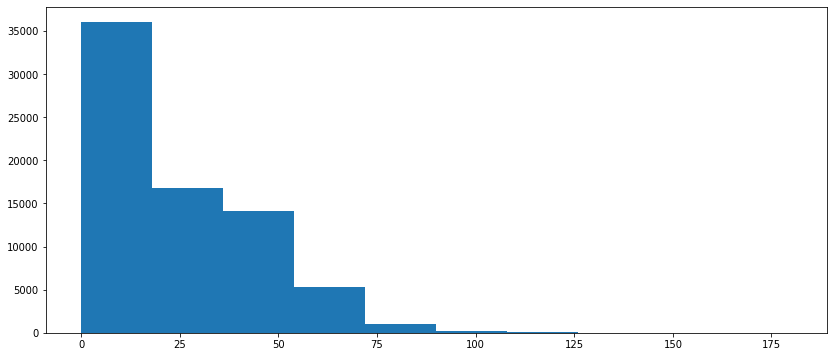

In [25]:
# Частотный график дистанции поездки
ax = plt.figure(figsize=(14,6))
plt.hist(data1['distance_km'])
plt.show()

<Figure size 720x1152 with 0 Axes>

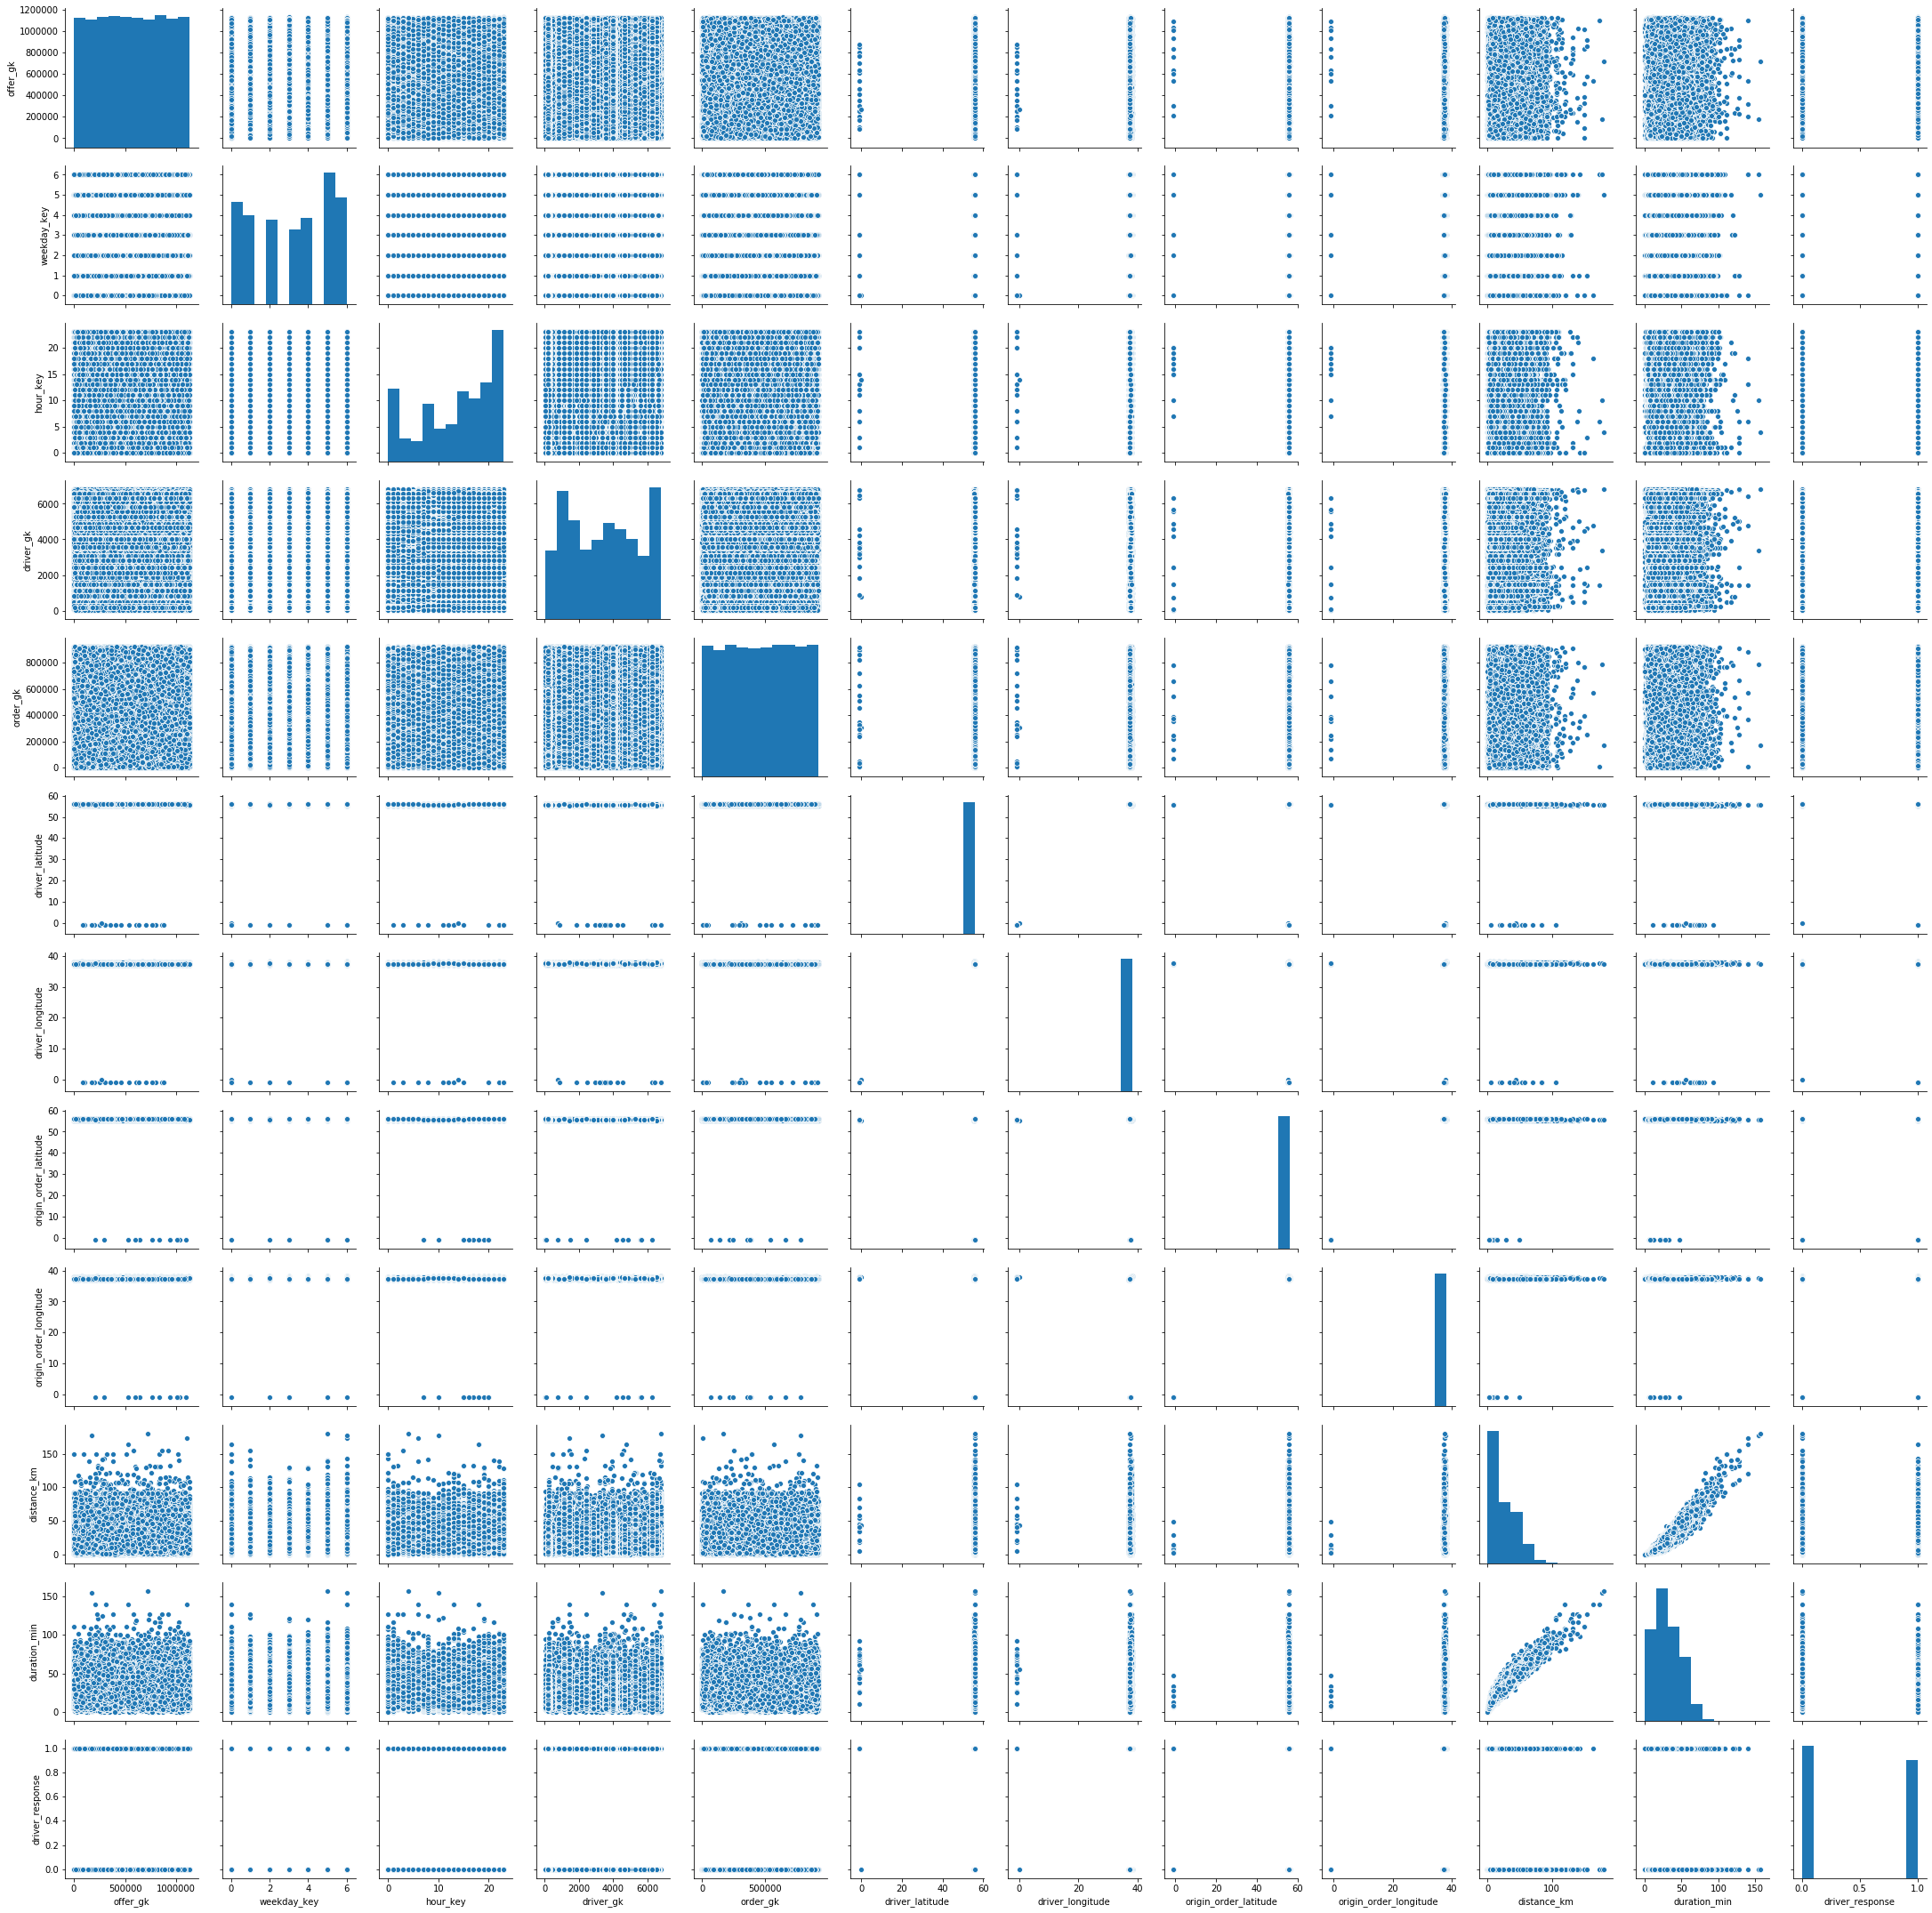

In [20]:
# Плотности распределения всех параметров очищенного датасета data1
plt.figure(figsize=(10, 16))
sns.pairplot(data1)
plt.show()

4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.

Построим матрицу корреляций и оценим взаимную зависимость признаков:

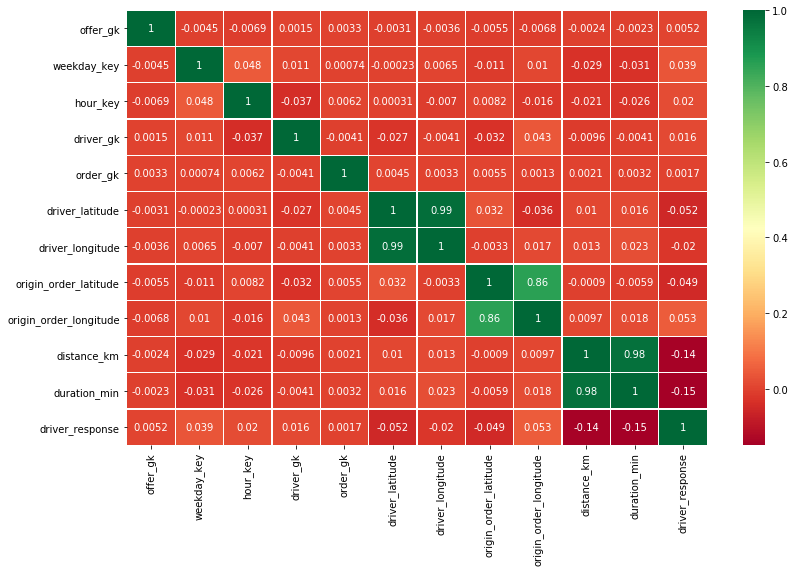

In [22]:
plt.figure(figsize=(13, 8))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
plt.show()

Из этой матрицы можно сделать выводы: Коррелируют между собой признаки широты и долготы, а так же дистанции и времени поездки. Это вполне ожидаемо.

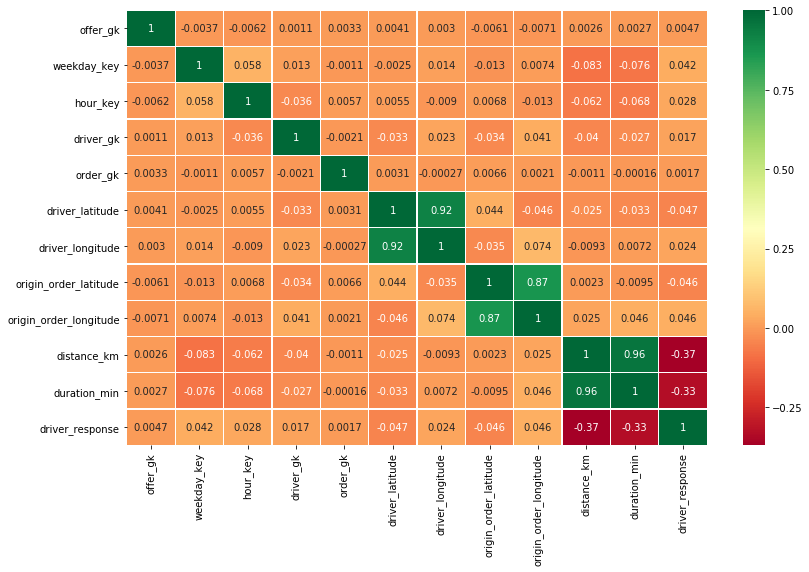

In [23]:
plt.figure(figsize=(13, 8))
sns.heatmap(data1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
plt.show()

Значения корреляции для нового урезанного датасета изменились незначительно. Обратнопророрциональная зависимость между driver_response и (distance_km с duration_min) стала более выраженной.
  

5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).

In [5]:
# выделяем данные определённого типа - категориальные переменные
obj_data = data1.select_dtypes(include=['object']).copy()
obj_data.head()

,offer_class_group,ride_type_desc
0,Standard,private
1,Economy,private
2,Economy,private
3,Economy,private
4,Economy,private


In [6]:
feature_names = data1.select_dtypes(include=['object']).copy()
for column in feature_names: 
    print(column)
    print(data1[column].value_counts(dropna=False))

offer_class_group
Economy     40736
Standard    29821
Premium      1004
Delivery      884
Kids          567
XL            442
VIP           105
VIP+           11
Name: offer_class_group, dtype: int64
ride_type_desc
private     73389
business      162
SMB            19
Name: ride_type_desc, dtype: int64


Преобразуем категориальные переменные

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
label_enc = LabelEncoder()
offer_class_label = label_enc.fit_transform(data1['offer_class_group'])
data1.loc[:, 'offer_class_group'] = offer_class_label
ride_type_desc = label_enc.fit_transform(data1['ride_type_desc'])
data1.loc[:, 'ride_type_desc'] = ride_type_desc

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
data1.head(10)

,index,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,4,2,1
1,2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,1,2,0
2,4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,2,1
3,5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,1,2,0
4,7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,1,2,0
5,8,493006,5,20,6080,753429,55.818748,37.338240,55.835764,37.294710,6.222,15.433,1,2,0
6,9,953983,6,7,6080,533820,55.839155,37.251947,55.833198,37.312197,10.410,23.083,1,2,0
7,10,479392,6,11,6080,139936,55.857133,37.414013,55.846374,37.362253,27.641,29.567,1,2,0
8,11,976469,3,7,6080,620017,55.819520,37.322065,55.811627,37.363944,16.683,25.633,1,2,0
9,12,139598,6,14,6080,279573,55.815298,37.350735,55.809279,37.325665,7.733,10.617,1,2,0


In [9]:
feature_names = data1[['offer_class_group','ride_type_desc']].columns.tolist() 
for column in feature_names: 
    print(column)
    print(data1[column].value_counts(dropna=False))

offer_class_group
1    40736
4    29821
3     1004
0      884
2      567
7      442
5      105
6       11
Name: offer_class_group, dtype: int64
ride_type_desc
2    73389
1      162
0       19
Name: ride_type_desc, dtype: int64


6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.

In [10]:
data1.columns

Index(['index', 'offer_gk', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk',
       'driver_latitude', 'driver_longitude', 'origin_order_latitude',
       'origin_order_longitude', 'distance_km', 'duration_min',
       'offer_class_group', 'ride_type_desc', 'driver_response'],
      dtype='object')

Между собой коррелируют признаки:
 - 'distance_km', 'duration_min'
 - 'driver_latitude', 'driver_longitude'
 - 'origin_order_latitude', 'origin_order_longitude'
Заменим каждую пару на составной признак

In [11]:
import reverse_geocoder as rg 
import pprint as pp

In [12]:
# Функция определяет местоположение по координатам для датасета данных с построчным извлечением координат
def reverseGeocode(dataset):
    result = rg.search((dataset['origin_order_latitude'],dataset['origin_order_longitude']))[0]['name']
    return result
    

Пример применения функции

In [18]:
data2 = data1[['origin_order_latitude','origin_order_longitude']].head(100)

In [19]:
data2['conversion'] = data2.apply(reverseGeocode, axis=1)

In [20]:
data2

,origin_order_latitude,origin_order_longitude,conversion
0,55.819329,37.466398,Pokrovskoye-Streshnevo
1,55.814827,37.354074,Pavshino
2,55.812559,37.527407,Koptevo
3,55.814827,37.354074,Pavshino
4,55.839134,37.304101,Krasnogorsk
5,55.835764,37.294710,Krasnogorsk
6,55.833198,37.312197,Krasnogorsk
7,55.846374,37.362253,Pavshino
8,55.811627,37.363944,Pavshino
9,55.809279,37.325665,Krasnogorsk


In [ ]:
Функция работает очень медленно, поэтому решил применить другой способ обработки координат

In [27]:
data1.loc[:,'driver_coordinates'] = data1['driver_latitude'] * data1['driver_longitude'] 
data1.loc[:,'order_coordinates'] = data1['origin_order_latitude'] * data1['origin_order_longitude'] 
data1.loc[:,'km_minut'] = data1['duration_min'] / data1['distance_km'] 
data1.head()

,index,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,km_minut,driver_coordinates,order_coordinates
0,1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,4,2,1,1.341187,2093.538689,2091.349196
1,2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,1,2,0,1.452497,2084.523036,2084.911178
2,4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,2,1,1.554551,2093.839644,2094.500617
3,5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,1,2,0,1.452497,2085.454119,2084.911178
4,7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,1,2,0,2.592617,2079.951050,2083.028694


In [ ]:
Удалим лишние признаки

In [28]:
data1.columns

Index(['index', 'offer_gk', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk',
       'driver_latitude', 'driver_longitude', 'origin_order_latitude',
       'origin_order_longitude', 'distance_km', 'duration_min',
       'offer_class_group', 'ride_type_desc', 'driver_response', 'km_minut',
       'driver_coordinates', 'order_coordinates'],
      dtype='object')

In [31]:
data1 = data1.drop(['index', 'offer_gk','driver_latitude', 'driver_longitude', 'origin_order_latitude',
       'origin_order_longitude', 'distance_km', 'duration_min'], axis = 1)

In [32]:
data1.head()

,weekday_key,hour_key,driver_gk,order_gk,offer_class_group,ride_type_desc,driver_response,km_minut,driver_coordinates,order_coordinates
0,5,14,6080,358774,4,2,1,1.341187,2093.538689,2091.349196
1,6,14,6080,866260,1,2,0,1.452497,2084.523036,2084.911178
2,4,16,6080,506710,1,2,1,1.554551,2093.839644,2094.500617
3,6,15,6080,360328,1,2,0,1.452497,2085.454119,2084.911178
4,5,20,6080,254374,1,2,0,2.592617,2079.951050,2083.028694


In [39]:
data1.columns

Index(['weekday_key', 'hour_key', 'driver_gk', 'order_gk', 'offer_class_group',
       'ride_type_desc', 'driver_response', 'km_minut', 'driver_coordinates',
       'order_coordinates'],
      dtype='object')

In [40]:
data_col1 = ['weekday_key', 'hour_key', 'offer_class_group', 'ride_type_desc', 'driver_response'
             , 'km_minut','driver_coordinates', 'order_coordinates']

In [41]:
data_colX1 = ['weekday_key', 'hour_key', 'driver_gk', 'order_gk', 'offer_class_group',
       'ride_type_desc', 'km_minut', 'driver_coordinates','order_coordinates']

In [121]:
data_colX2 = ['km_minut']

In [122]:
dataX = data1[data_colX1]
dataX.head()

,weekday_key,hour_key,driver_gk,order_gk,offer_class_group,ride_type_desc,km_minut,driver_coordinates,order_coordinates
0,5,14,6080,358774,4,2,1.341187,2093.538689,2091.349196
1,6,14,6080,866260,1,2,1.452497,2084.523036,2084.911178
2,4,16,6080,506710,1,2,1.554551,2093.839644,2094.500617
3,6,15,6080,360328,1,2,1.452497,2085.454119,2084.911178
4,5,20,6080,254374,1,2,2.592617,2079.951050,2083.028694


7. Разделите выборку на обучаемую и тестовую.

In [127]:
# Разделим выборку на обучаемую и тестовую
output_y = data1[['driver_response']]
input_x = data1[data_colX1]
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, output_y, test_size=0.2)

8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

In [128]:
from sklearn.ensemble import RandomForestClassifier
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра с глубиной дерева 20
model=RandomForestClassifier(n_estimators=100, max_depth=20)

# обучаем модель
model.fit(X_train_22,y_train_22)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(max_depth=20)

Наиболее важные атрибуты модели RandomForest

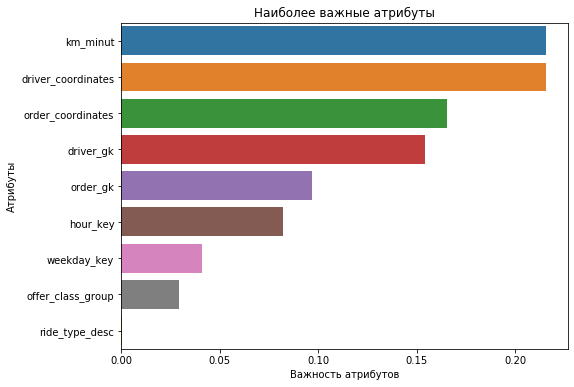

In [133]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
#plt.legend()
plt.show()

Можно сделать вывод, что наиболее значимые атрибуты это дальность поездки (у нас это время затраченное на километр), координаты водителя и координаты заказа.

Посчитаем качество модели - classification report:

In [130]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test_22)
print(classification_report(y_test_22, model_pred))
print('Точность предсказания модели на тестовых данных:', model.score(X_test_22, y_test_22))
print('Точность предсказания модели на тренировочных данных:',model.score(X_train_22, y_train_22))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      7743
           1       0.76      0.85      0.80      6971

    accuracy                           0.80     14714
   macro avg       0.80      0.80      0.80     14714
weighted avg       0.80      0.80      0.80     14714

Точность предсказания модели на тестовых данных: 0.7975397580535545
Точность предсказания модели на тренировочных данных: 0.9672081011281772


Результаты точности предсказания при разных параметрах RandomForest:
Модель "RandomForest" с глубиной дерева 5 дала точность предсказания 74.2%.
Модель "RandomForest" с глубиной дерева 10 дала точность предсказания 78%.
Модель "RandomForest" с глубиной дерева 20 дала точность предсказания 80%.
При глубине дерева более 15 происходит переобучение модели. Разрыв точности между тестом и трейном становится большой.
Количество деревьев, начиная с 50 не влияет на точность данной модели.

Проверим какая будет точность модели, если оставить только один самый значимый параметр "km_minut"

In [123]:
# Разделим выборку на обучаемую и тестовую
output_y = data1[['driver_response']]
input_x = data1[data_colX2]
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, output_y, test_size=0.2)

In [124]:
from sklearn.ensemble import RandomForestClassifier
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра с глубиной дерева 20
model=RandomForestClassifier(n_estimators=100, max_depth=20)

# обучаем модель
model.fit(X_train_22,y_train_22)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(max_depth=20)

Посчитаем качество модели - classification report:

In [126]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test_22)
print(classification_report(y_test_22, model_pred))
print('Точность предсказания модели на тестовых данных:', model.score(X_test_22, y_test_22))
print('Точность предсказания модели на тренировочных данных:',model.score(X_train_22, y_train_22))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69      7717
           1       0.66      0.74      0.70      6997

    accuracy                           0.69     14714
   macro avg       0.70      0.70      0.69     14714
weighted avg       0.70      0.69      0.69     14714

Точность предсказания модели на тестовых данных: 0.6937610439037651
Точность предсказания модели на тренировочных данных: 0.7739907571020797


Точность предсказания для модели с одним параметром значительно хуже - 69.4%.

Применим метод Градиентный бустинг XGBoost для предсказательной модели

In [134]:
#!pip install xgboost

In [136]:
import xgboost
from sklearn.metrics import accuracy_score

In [147]:
# Разделим выборку на обучаемую и тестовую
output_y = data1[['driver_response']]
input_x = data1[data_colX1]
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, output_y, test_size=0.2)

По умолчанию, предсказания, сделанные XGBoost являются вероятностями. Поскольку это бинарная задача классификации, каждое предсказание является вероятностью принадлежности к первому классу. Поэтому мы можем легко преобразовать их в значения двоичных классов путем округления до 0 или 1.

In [148]:
# fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train_22, y_train_22)
# make predictions for test data
y_pred = model.predict(X_test_22)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test_22, predictions)
print("Точность предсказания модели : %.2f%%" % (accuracy * 100.0))

Точность предсказания модели: 82.76%


Точность предсказания модели XGBoost (82.8%) получилась чуть больше точности предсказания модели RandomForest (80%).